#### Fast Hand Tracking with Google Mediapipe (it has free use copyright even for commercial purpose!)

In [23]:
# Ref: https://github.com/google/mediapipe
# Ref: https://www.youtube.com/watch?v=NZde8Xt78Iw&ab_channel=Murtaza%27sWorkshop-RoboticsandAI

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
import cv2
import mediapipe as mp

In [43]:
import sys
sys.path.append('C:/Users/Mafeus/Desktop/Git_Repos/OpenCV')
import OpCV_Utils

In [24]:
mpDraw = mp.solutions.drawing_utils
mpHands = mp.solutions.hands
hands = mpHands.Hands(static_image_mode=False, max_num_hands=1, min_detection_confidence=0.5, min_tracking_confidence=0.5)

In [22]:
thumb         = [1, 2, 3, 4]
index_finger  = [5, 6, 7, 8]
middle_finger = [9, 10, 11, 12]
ring_finger   = [13, 14, 15, 16]
pinky_finger  = [17, 18, 19, 20]

In [41]:
# Load Video:
video = 'libras_2.mp4'
cap = cv2.VideoCapture(video)
video_fps = cap.get(cv2.CAP_PROP_FPS)

while True:
    
    start = time.time()
    
    success, frame = cap.read()
    
    frame = cv2.flip(frame, 1)
    
    if not success:
        print('Server OFF')
        break
        
    frame = cv2.resize(frame, (0,0), None, 0.8, 0.8)    
    
    #####################################################################################################################
    
    results = hands.process(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    
    if results.multi_hand_landmarks: 
        for handLandmarks in results.multi_hand_landmarks:
            
            landmarks_list = []
            
            for id, lm in enumerate(handLandmarks.landmark):
                h, w, c = frame.shape
                cX, cY  = int(lm.x*w), int(lm.y*h)
                
                cv2.circle(frame, (cX, cY), 1, (255, 0, 0), cv2.FILLED)
                cv2.putText(frame, '{}'.format(id), (cX, cY), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (150, 0, 0), 1)
                
                landmarks_list.append([id, cX, cY])
    
            mpDraw.draw_landmarks(frame, handLandmarks, mpHands.HAND_CONNECTIONS)
    
    #####################################################################################################################
    
    # Keyboard Controls:
    
    key = cv2.waitKey(1) or 0xff   
        
    if key == ord('k'):
        break
        
    if key == ord('p'):
        cv2.waitKey(0)
       
    end = time.time()

    frame_time = (end - start) + 0.0001
    fps = np.floor(1/frame_time)
        
    if (fps > video_fps):
        time.sleep(1/video_fps)
        fps = video_fps
            
    cv2.putText(frame, "FPS: {}".format(fps), (30,20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)
    
    cv2.imshow("Output", frame)
    
cv2.destroyAllWindows()
cap.release()

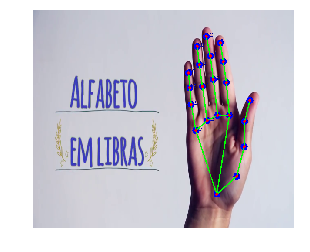

In [13]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.axis('off');